In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import scvelo as scv
import scanpy as sc
from skimage.draw import polygon
from shapely.geometry import Polygon
import imageio
import tifffile
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import linregress
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.signal as signal
import peakutils
import seaborn as sns
import sklearn
import shapely
import os

# Prepare LASSO

In [4]:
adata_rna = ad.read_h5ad("path/to/file/adata_rna.h5ad")

In [99]:
min_cell_percentage = 5
min_cells = int((min_cell_percentage / 100) * adata_rna.n_obs)

gene_filter = (adata_RNA.X > 0).sum(axis=0).A1 >= min_cells
filtered_genes = adata_rna.var_names[gene_filter]

adata_filtered = adata_rna[:, gene_filter]

In [101]:
expression_df = pd.DataFrame(adata_filtered.X.toarray(), index=adata_filtered.obs_names, columns=adata_filtered.var_names)
expression_df.to_csv("AUC_LASSO/filtered_expression_v4.csv")
adata_filtered.obs.to_csv("AUC_LASSO/cell_metadata_v4.csv")
adata_filtered.var.to_csv("AUC_LASSO/gene_metadata_v4.csv")

# Compare AUC with Predicted AUC

In [ ]:
adata_with_gcamp = ad.read_h5ad("path/to/adata_gcamp.h5ad")

In [19]:
pred_auc = pd.read_csv("LASSO_954_Variables_Predictions_auc_median_log.csv")
pred_auc.index = pred_auc['Cell_Name']
pred_auc_scaled = pd.read_csv("LASSO_954_Variables_Predictions_scaled_auc_median_log.csv")
pred_auc_scaled.index = pred_auc_scaled['Cell_Name']
adata_with_gcamp.obs['AUC_pred'] = pred_auc.loc[adata_with_gcamp.obs_names, 'Predicted_Y']
adata_with_gcamp.obs['AUC_pred_scaled'] = pred_auc_scaled.loc[adata_with_gcamp.obs_names, 'Predicted_Y']

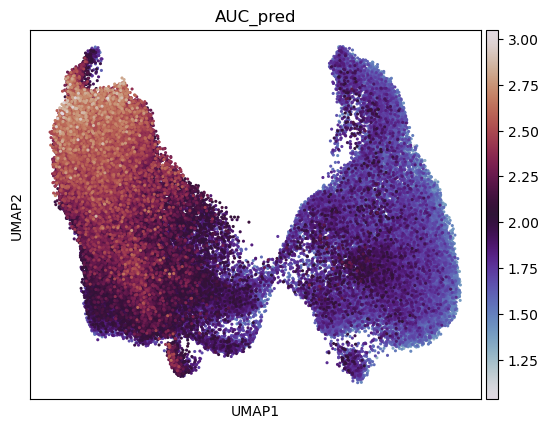

In [34]:
sc.pl.umap(adata_with_gcamp, color="AUC_pred", color_map='twilight', size=20)

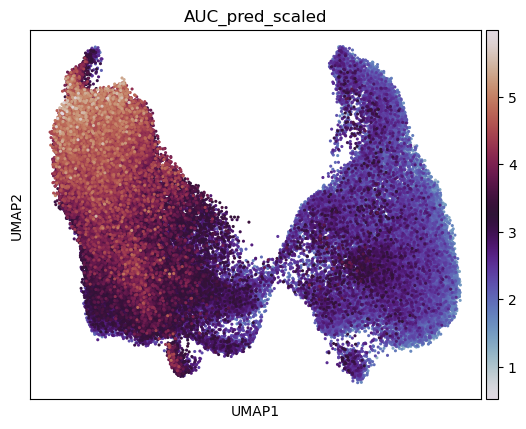

In [33]:
sc.pl.umap(adata_with_gcamp, color="AUC_pred_scaled", color_map='twilight', size=20)

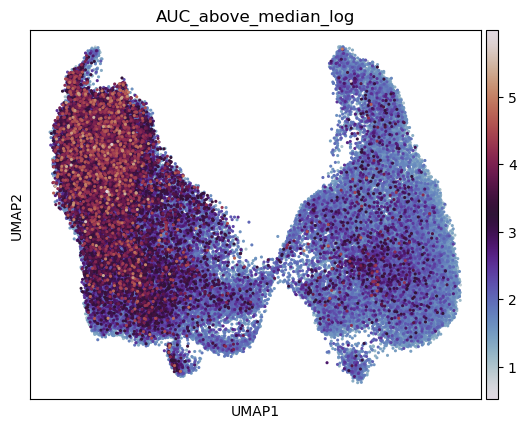

In [32]:
sc.pl.umap(adata_with_gcamp, color="AUC_above_median_log", color_map="twilight", size=20)

# LASSO Significant Genes

In [2]:
lasso_coeffs = pd.read_csv('path/to/file/lasso_nonzero_coefficients_selected_models.csv')
lasso_coeffs = lasso_coeffs[lasso_coeffs['Model'] == 'lambda_0.0413']

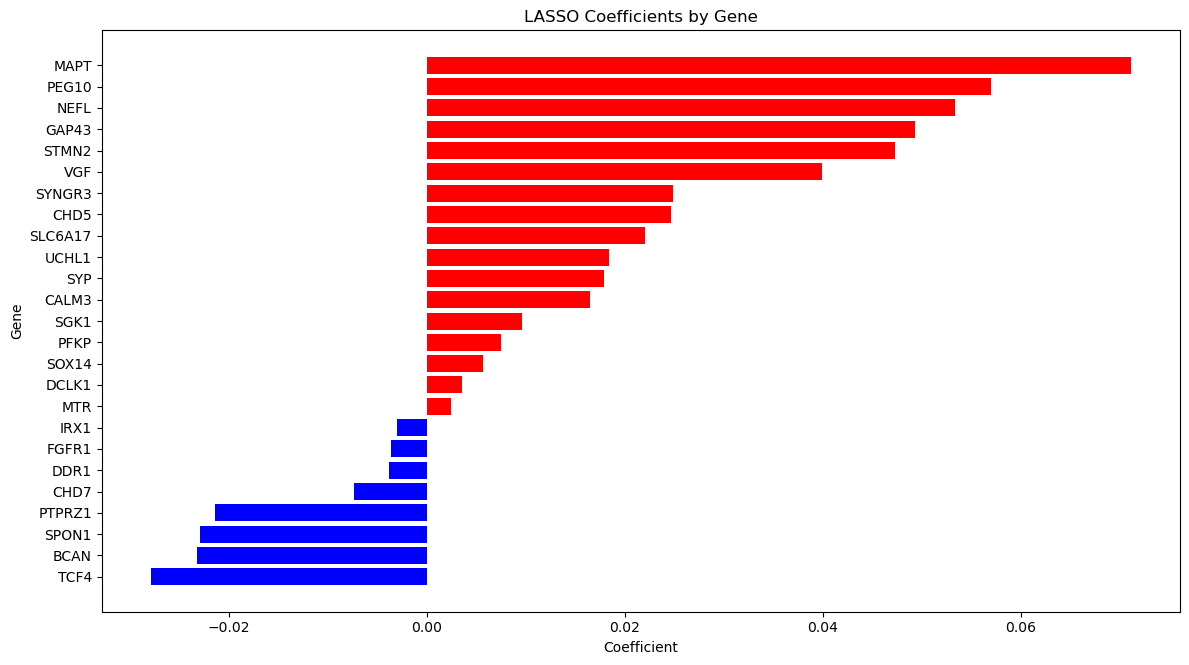

In [3]:
lasso_coeffs['color'] = lasso_coeffs['Coefficient'].apply(lambda x: 'red' if x > 0 else 'blue')
plt.figure(figsize=(12, len(lasso_coeffs) * 0.27))
plt.barh(lasso_coeffs['Gene'], lasso_coeffs['Coefficient'], color=lasso_coeffs['color'])
plt.gca().invert_yaxis()
plt.xlabel("Coefficient")
plt.ylabel("Gene")
plt.title("LASSO Coefficients by Gene")

plt.tight_layout()

plt.show()

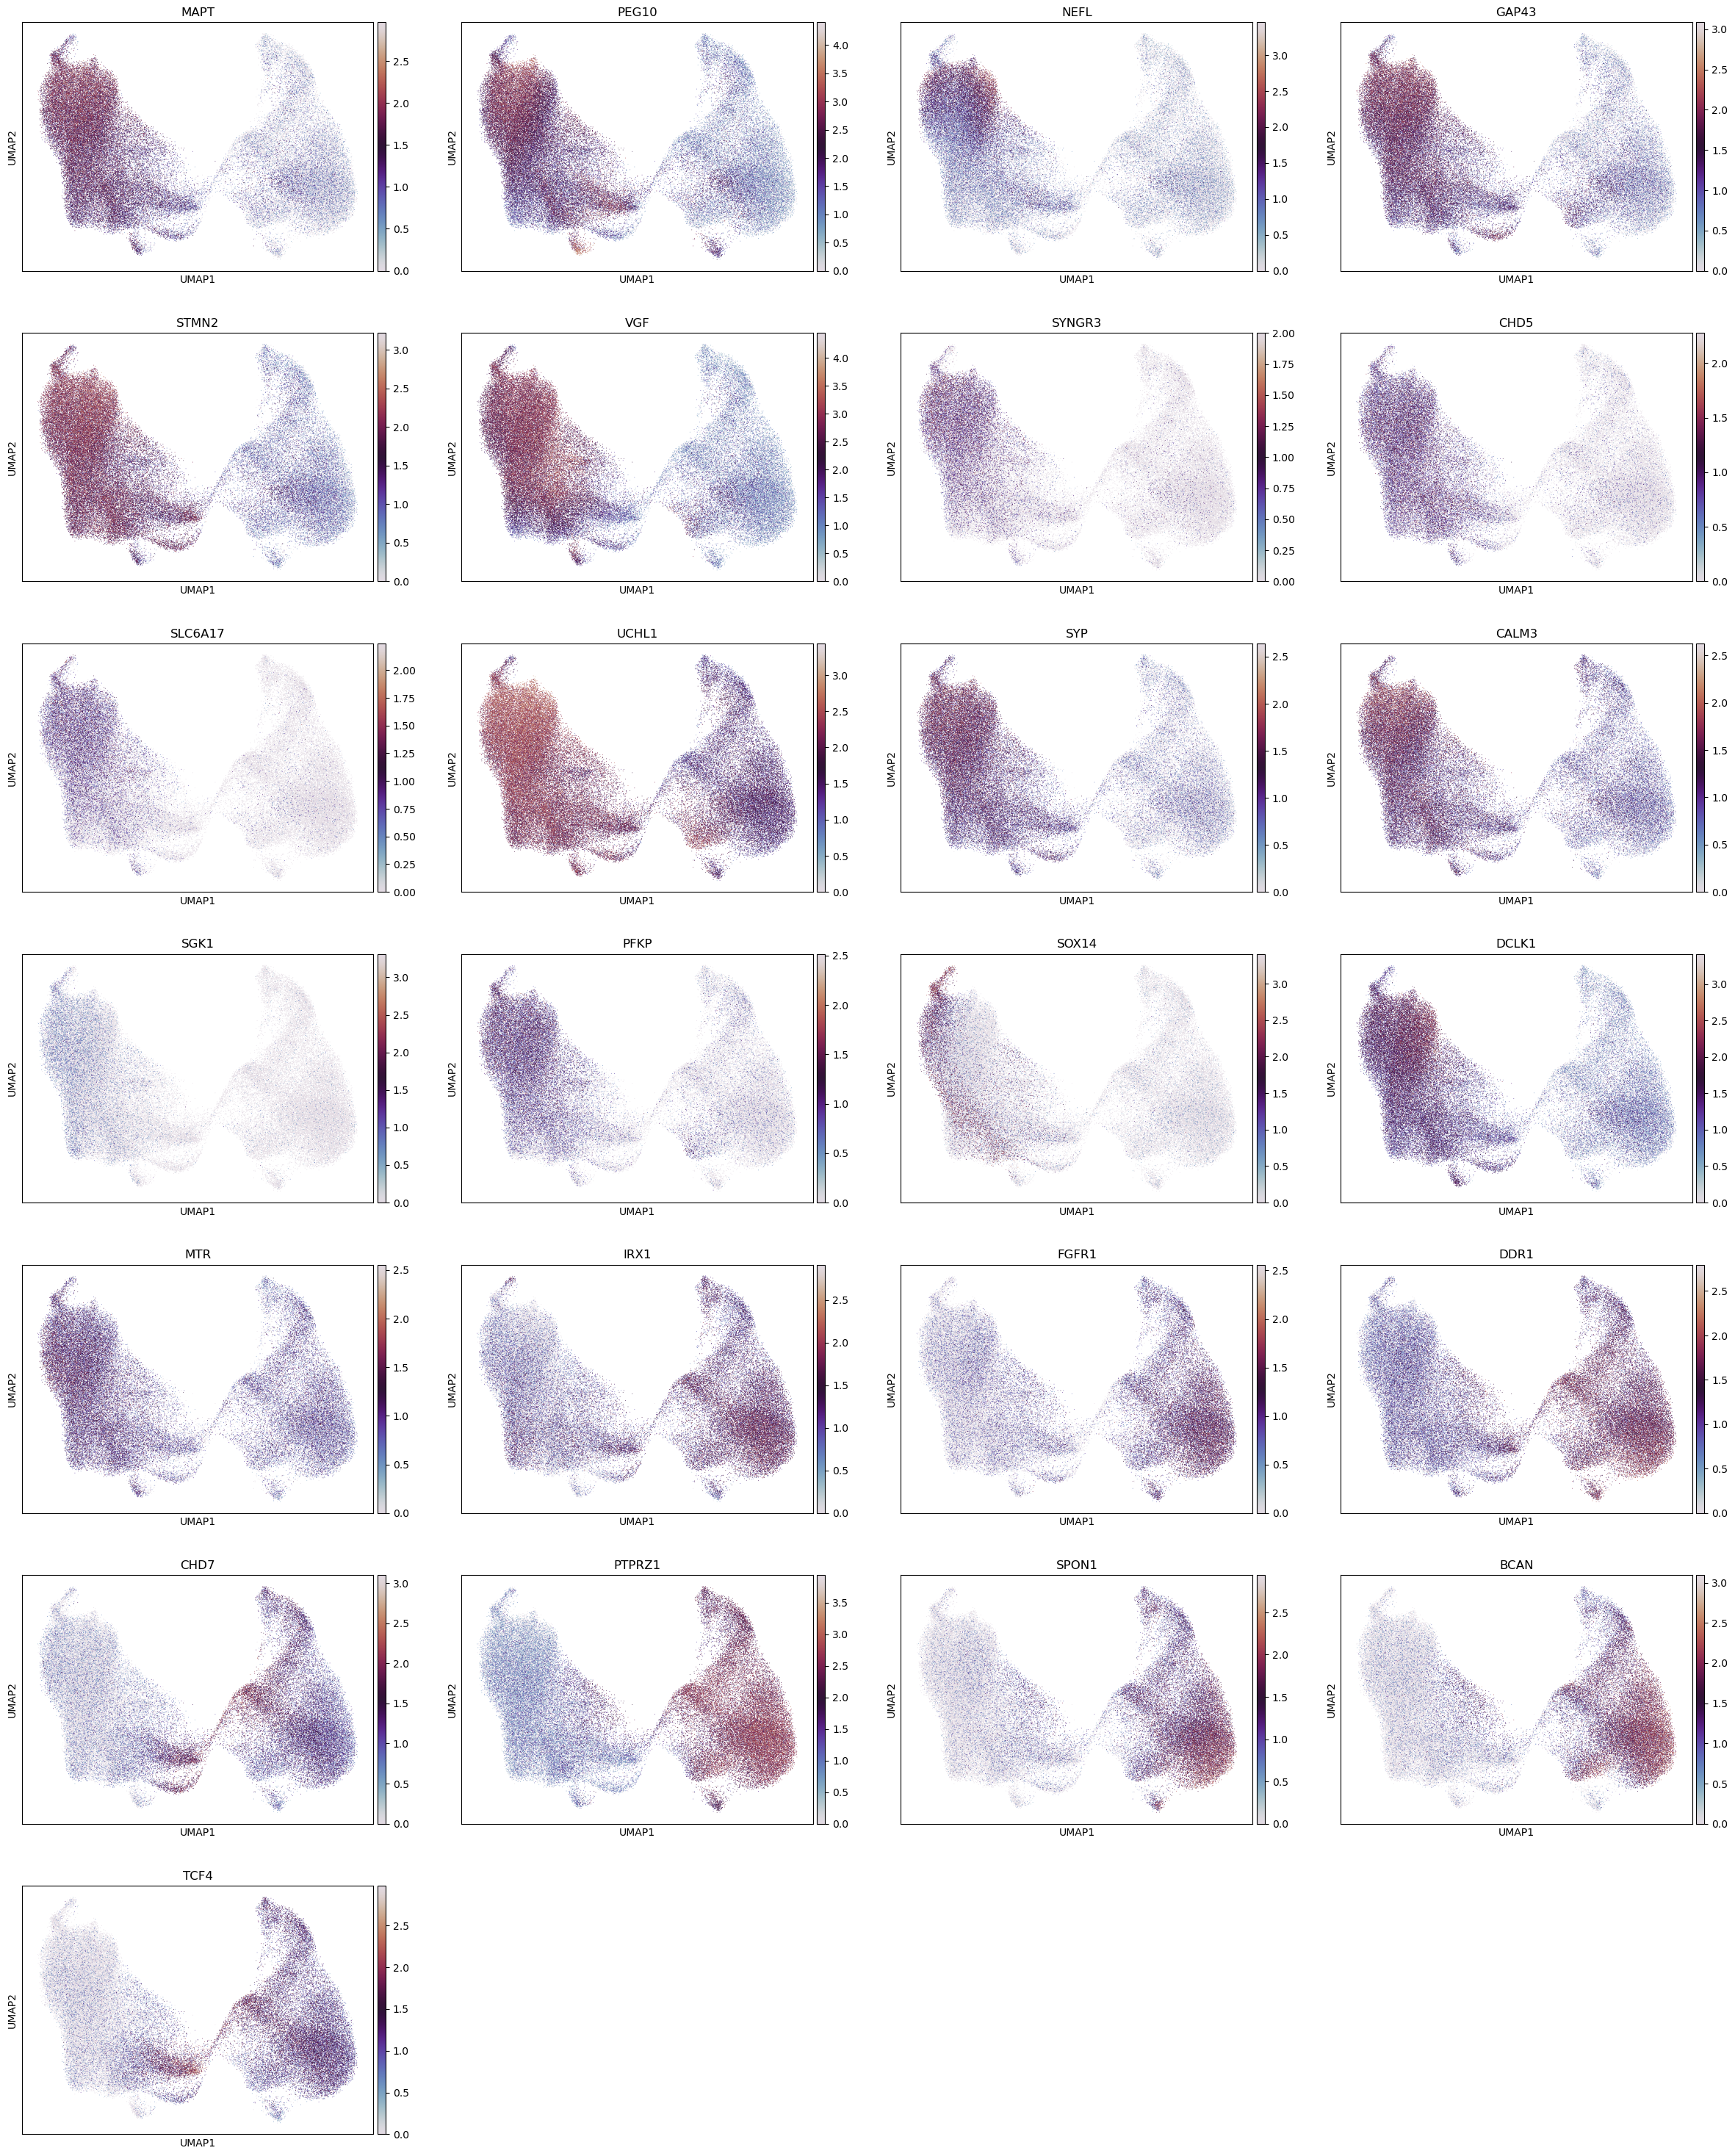

In [6]:
sc.pl.umap(adata_rna, color=list(lasso_coeffs['Gene']), color_map='twilight')